In [1]:
import os
import re

import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt

import nltk

In [2]:
input_path = "data/cdiscount_train.csv.zip"
nb_line=100000  # part totale extraite du fichier initial ici déjà réduit
data_all = pd.read_csv(input_path, sep=",", nrows=nb_line)
data_all = data_all.fillna("") # pour les valeurs nulles
data_all.head()

,Categorie1,Categorie2,Categorie3,Description,Libelle,Marque
0,INFORMATIQUE,CONNECTIQUE - ALIMENTATION,BATTERIE,Batterie Acer Aspire One 751H-52Yr - Li-Ion 11...,Batterie Acer Aspire One 751H-52Yr,AUCUNE
1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque rigide Bleu lagon pour ALCATEL OT / 6033...,Coque rigide Bleu lagon pour ALCATEL OT / 6033 …,MUZZANO
2,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Facades et coques CELLULAR LINE SHCKGALS 3 MIN...,Facades et coques CELLULAR LINE SHCKGALS 3 MINIP,CELLULAR LINE
3,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque meteore TPU LG Nexus 4 / E960,Coque meteore TPU LG Nexus 4 / E960,AUCUNE
4,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque souple Transparente pour LG G FLEX D959 ...,Coque souple Transparente pour LG G FLEX D959 m…,MUZZANO


In [20]:
data = data_all[["Categorie1","Description"]]
data

,Categorie1,Description
0,INFORMATIQUE,Batterie Acer Aspire One 751H-52Yr - Li-Ion 11...
1,TELEPHONIE - GPS,Coque rigide Bleu lagon pour ALCATEL OT / 6033...
2,TELEPHONIE - GPS,Facades et coques CELLULAR LINE SHCKGALS 3 MIN...
3,TELEPHONIE - GPS,Coque meteore TPU LG Nexus 4 / E960
4,TELEPHONIE - GPS,Coque souple Transparente pour LG G FLEX D959 ...
...,...,...
99995,DECO - LINGE - LUMINAIRE,Souvenirs de France - Tour Eiffel Miniature 'P...
99996,LIBRAIRIE,Fast Track to Waste-Free Manufacturing - John ...
99997,TELEPHONIE - GPS,fitBAG Bonga Girafe housse pochette pour télép...
99998,DECO - LINGE - LUMINAIRE,grand tableau minnie T 50x50 cm


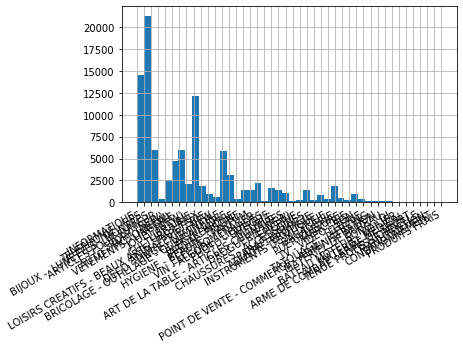

In [132]:
#Stats
#print(data['Categorie1'].describe())
#print(data['Categorie1'].value_counts()) #comptage des valeurs

counts=data['Categorie1'].value_counts().tolist()
values=data['Categorie1'].value_counts().keys().tolist()

fig=plt.figure(0)
data['Categorie1'].hist(bins=44)
fig.autofmt_xdate()


In [62]:
i = 0
txt = data['Description'].values[i]
print("Original Description : " + data['Description'])

0        Original Description : Batterie Acer Aspire On...
1        Original Description : Coque rigide Bleu lagon...
2        Original Description : Facades et coques CELLU...
3        Original Description : Coque meteore TPU  LG N...
4        Original Description : Coque souple Transparen...
                               ...                        
99995    Original Description : Souvenirs de France - T...
99996    Original Description : Fast Track to Waste-Fre...
99997    Original Description : fitBAG Bonga Girafe hou...
99998    Original Description : grand tableau minnie T ...
99999    Original Description : Étui en cuir avec empla...
Name: Description, Length: 100000, dtype: object


In [55]:
txt = txt.lower()
print(txt)

batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie… voir la présentation


In [56]:
txt = txt.replace(u'\u2026','.')    
txt = txt.replace(u'\u00a0',' ')
print(txt)

batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie. voir la présentation


In [57]:
txt = unicodedata.normalize('NFD', txt).encode('ascii', 'ignore').decode("utf-8")
print(txt)

batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie. voir la presentation


In [ ]:
txt = re.sub('[^a-z_]', ' ', txt)
print(txt)

In [ ]:
## listes de mots à supprimer dans la description des produits
## Depuis NLTK
stopwords = nltk.corpus.stopwords.words('french') 

stopwords[:10]

In [ ]:
stopwords = [unicodedata.normalize('NFD', sw).encode('ascii', 'ignore').decode("utf-8") for sw in stopwords]
stopwords[:10]

In [ ]:
tokens = [w for w in txt.split() if (len(w)>2) and (w not in stopwords)]
removed_words = [w for w in txt.split() if (len(w)<2) or (w in stopwords)]

print(tokens)
print(removed_words)

In [ ]:
## Fonction de setmming de stemming permettant la racinisation
stemmer=nltk.stem.SnowballStemmer('french')
tokens_stem = [stemmer.stem(token) for token in tokens]
print(tokens_stem)